In [1]:
from util.util import load_curves, load_log

# Load Data
n = [2000]
m = [10]
st = [1, 2, 5, 7, 10]
data = {}

for _n in n:
    for _st in st:
        _mIdx = 0
        folder_name = f"../result/increase_send_to/price_curve_{_st}_{m[_mIdx]}_{_n}"
        local_curves, onchain_curve, average_of_local_curves = load_curves(folder_name)
        log = load_log(f"{folder_name}/logs.json")
        data[f"{_st}_{m[_mIdx]}_{_n}"] = {
            "local_curves": local_curves,
            "onchain_curve": onchain_curve,
            "avg_local_curves": average_of_local_curves,
            "log": {
                **log,
                "Gas": log["AliceGas"]
                + log["SuperMatcherGas"]
                + log["ReporterGas"]
                + log["WorkerGas"]
                + log["MatcherGas"],
            },
        }

#### Gas

In [2]:
idx = [i for i in range(len(st))]

Gas = []
Amount = []
Amount_Local = []
Amount_Onchain = []
NoMatchedOrder = []
NoMatchedOrder_Local = []
NoMatchedOrder_Onchain = []
Time = []
Time_Local = []
Time_Onchain = []
ProfitLocal = []
ProfitOnchain = []
for i, _st in enumerate(st):
    _key = f"{_st}_{m[0]}_{n[0]}"
    ProfitLocal.append(data[_key]["log"]["TotalProfitLocal"])
    ProfitOnchain.append(data[_key]["log"]["TotalProfitOnchain"])
    NoMatchedOrder.append(
        data[_key]["log"]["NumberOfMatchedOrderLocal"]
        + data[_key]["log"]["NumberOfMatchedOrderOnchain"]
    )
    NoMatchedOrder_Local.append(data[_key]["log"]["NumberOfMatchedOrderLocal"])
    NoMatchedOrder_Onchain.append(data[_key]["log"]["NumberOfMatchedOrderOnchain"])
    Gas.append(data[_key]["log"]["Gas"])
    Amount.append(
        data[_key]["log"]["LocalMatchedAmount"]
        + data[_key]["log"]["OnchainMatchedAmount"]
    )
    Amount_Local.append(data[_key]["log"]["LocalMatchedAmount"])
    Amount_Onchain.append(data[_key]["log"]["OnchainMatchedAmount"])
    Time.append(
        data[_key]["log"]["LocalMatchTime"] + data[_key]["log"]["OnchainMatchTime"]
    )
    Time_Local.append(data[_key]["log"]["LocalMatchTime"])
    Time_Onchain.append(data[_key]["log"]["OnchainMatchTime"])

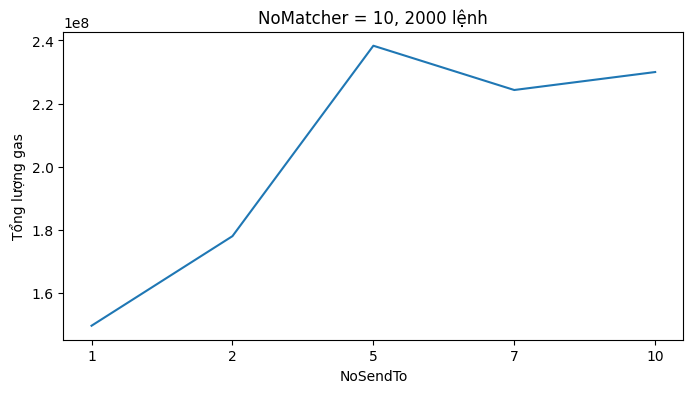

In [8]:
import matplotlib.pyplot as plt
colors = plt.cm.tab10.colors

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(Gas, color=colors[0])
ax.set_title("NoMatcher = 10, 2000 lệnh")
ax.set_xticks(idx)
ax.set_ylabel("Tổng lượng gas")
ax.set_xlabel("NoSendTo")
ax.set_xticklabels(st)
plt.show()

In [4]:
# import matplotlib.pyplot as plt
# colors = plt.cm.tab10.colors

# fig, ax = plt.subplots( figsize=(8, 4))
# ax.plot(Time, label="Time", color=colors[0])
# ax.plot(Time_Local, label="Time Local", color=colors[1])
# ax.plot(Time_Onchain, label="Time Onchain", color=colors[2])
# ax.set_title("NoMatcher = 10, 1500 lệnh")
# ax.set_xticks(idx)
# ax.set_xticklabels(st)
# ax.set_xlabel("NoSendTo")
# ax.set_ylabel
# plt.show()

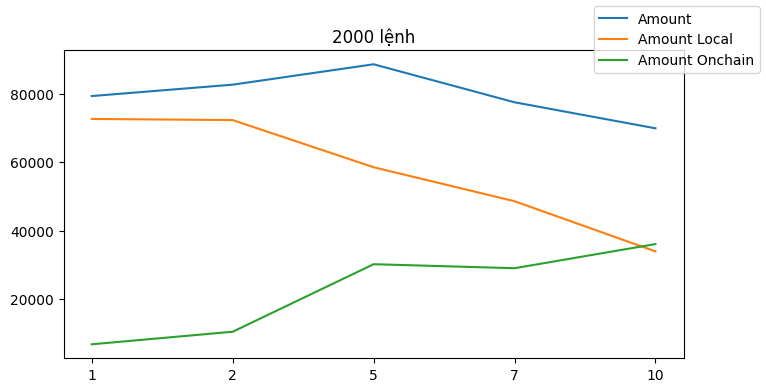

In [9]:
import matplotlib.pyplot as plt
colors = plt.cm.tab10.colors

fig, ax = plt.subplots( figsize=(8, 4))
ax.plot(Amount, label="Amount", color=colors[0])
ax.plot(Amount_Local, label="Amount Local", color=colors[1])
ax.plot(Amount_Onchain, label="Amount Onchain", color=colors[2])
ax.set_title("2000 lệnh")
ax.set_xticks(idx)
ax.set_xticklabels(st)
fig.legend()
plt.show()

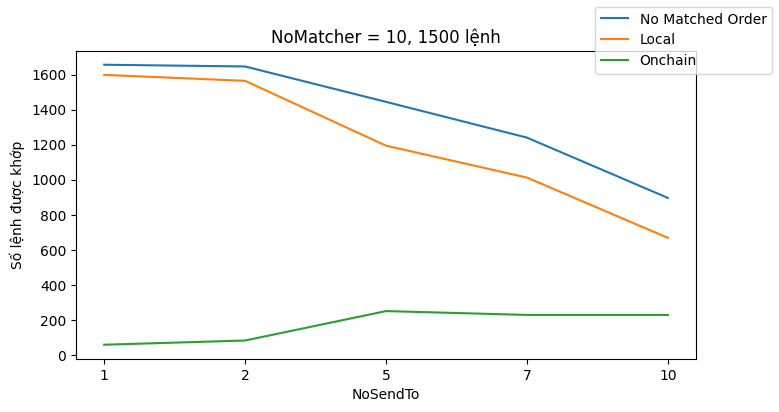

In [6]:
import matplotlib.pyplot as plt
colors = plt.cm.tab10.colors

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(NoMatchedOrder, label="No Matched Order", color=colors[0])
ax.plot(NoMatchedOrder_Local, label="Local", color=colors[1])
ax.plot(NoMatchedOrder_Onchain, label="Onchain", color=colors[2])
ax.set_title("NoMatcher = 10, 1500 lệnh")
ax.set_xticks(idx)
ax.set_xticklabels(st)
ax.set_xlabel("NoSendTo")
ax.set_ylabel("Số lệnh được khớp")
fig.legend()
plt.show()

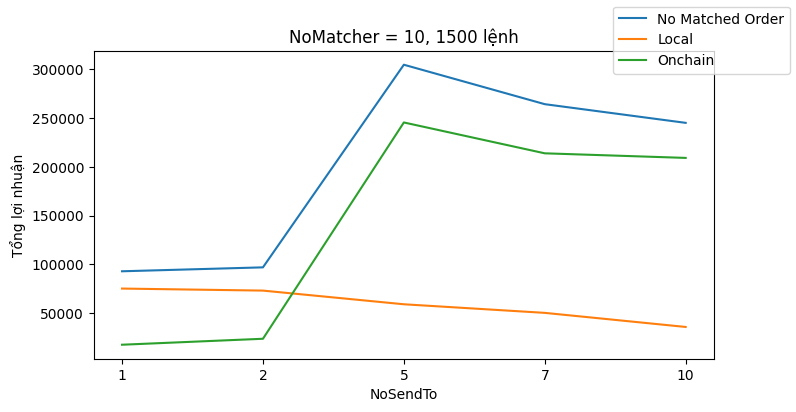

In [7]:
import matplotlib.pyplot as plt
colors = plt.cm.tab10.colors

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot([ProfitLocal[i]+ProfitOnchain[i] for i in range(len(ProfitLocal))], label="No Matched Order", color=colors[0])
ax.plot(ProfitLocal, label="Local", color=colors[1])
ax.plot(ProfitOnchain, label="Onchain", color=colors[2])
ax.set_title("NoMatcher = 10, 1500 lệnh")
ax.set_xticks(idx)
ax.set_xticklabels(st)
ax.set_xlabel("NoSendTo")
ax.set_ylabel("Tổng lợi nhuận")
fig.legend()
plt.show()